# 2.2 Ryzyko przeuczenia


### Zbiór losowych danych

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(8)

xy_df = pd.DataFrame({
    "x": np.random.random(size=20),
    "y": np.random.random(size=20),
    "class": np.random.choice([0, 1], p=[.5, .5], size=20)
})
xy_df.sample(5)

,x,y,class
10,0.555356,0.028732,0
1,0.968541,0.982871,1
18,0.333774,0.801056,1
13,0.712375,0.764160,0
4,0.232728,0.070943,0


<Axes: xlabel='x', ylabel='y'>

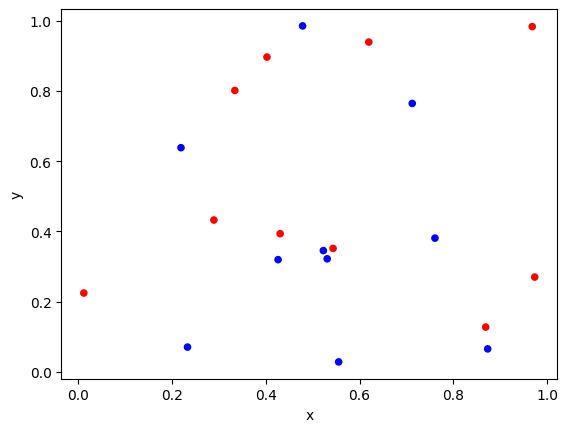

In [8]:
xy_df.plot.scatter(x="x", y="y", c="class", cmap="bwr", colorbar=False)

In [7]:
import matplotlib.pyplot as plt

In [14]:
x_means = xy_df["x"].sort_values().rolling(2).mean().dropna() # weź wartości z kolumny x -> posortuj -> zbierz w pary -> oblicz dla każdej z nich średnią -> upuść pierwszą wartość 'not a number'
# wynikiem będzie tablica z liczbą n-1 wartości
x_means

19    0.115100
4     0.225765
16    0.260902
18    0.311425
7     0.368063
15    0.414222
6     0.428280
9     0.454430
8     0.500533
3     0.526765
11    0.537121
10    0.549371
14    0.587519
13    0.666028
12    0.736635
2     0.815045
0     0.871312
1     0.920985
17    0.971198
Name: x, dtype: float64

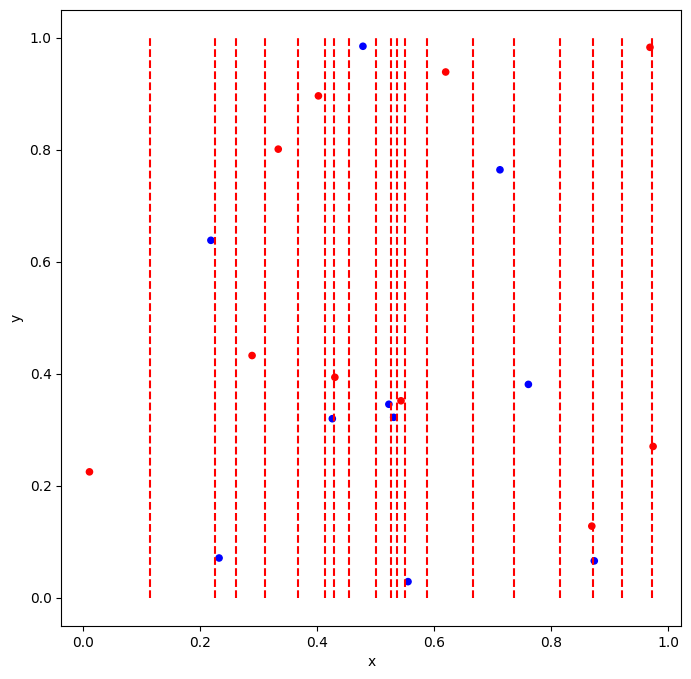

In [12]:
xy_df.plot.scatter(x="x", y="y", c="class", cmap="bwr", colorbar=False, figsize=(8, 8))

for x in x_means:
    plt.plot([x, x], [0, 1], "r--")

Podzieliliśmy płaszczyznę prostymi w taki sposób, że każdy element jest odseparowany od reszty i jest w swojej grupie. Nasz system stał się kaskadą warunków logicznych, które doskonale rozpoznają wszystkie przykłady uczące, ale nic więcej. Musimy więc ograniczyć nasze drzewo w taki sposób, aby nie dopuścić chociażby do tego, aby jego wysokość mogła rosnąć w nieskończoność czy do by w danej grupie znalazła się tylko jedna obserwacja.

### Rozpoznawanie przeuczenia
Tworząc system czy to klasyfikacji czy to regresji, będziemy monitorować pewne wartości nazywane metrykami, które mówią nam o tym jak dobry jest system, który stworzyliśmy i pozwala porównywać różne modele ze sobą. Typowym procesem jest podział zbioru danych do pozbioru: treningowy oraz testowy, bądź, jeszcze lepiej, przeprowadzenie walidacji krzyżowej. Oznacza to, że nauczamy system na jednym zbiorze, a sprawdzamy na zupełnie innym. Metryki te możemy jednak obliczyć do obydwu, co jest dość interesujące jeśli chodzi o zjawisko overfittingu. Jeśli wartości metryk na zbiorze treningowym znacząco odbiegają od tych obliczonych na zbiorze testowym, to prawdopodobnie nasz model nie generalizuje za dobrze i może to sygnalizować tego rodzaju problem.